In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans

In [3]:
df1 = pd.read_csv ('archive/olist_customers_dataset.csv',usecols= ['customer_id','customer_zip_code_prefix','customer_age'])

df1.head()
df2= pd.read_csv ('archive/olist_geolocation_dataset.csv',usecols= ['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng','geolocation_city'])
df2.head()
df_cd = pd.merge(df1, df2, how='inner', left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')
#print(df_cd.shape)
df_cd.head(5000)

,customer_id,customer_zip_code_prefix,customer_age,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,50,14409,-20.509897,-47.397866,franca
1,06b8999e2fba1a1fbc88172c00ba8bc7,14409,50,14409,-20.497396,-47.399241,franca
2,06b8999e2fba1a1fbc88172c00ba8bc7,14409,50,14409,-20.510459,-47.399553,franca
3,06b8999e2fba1a1fbc88172c00ba8bc7,14409,50,14409,-20.480940,-47.394161,franca
4,06b8999e2fba1a1fbc88172c00ba8bc7,14409,50,14409,-20.515413,-47.398194,franca
...,...,...,...,...,...,...,...
4995,60aa677f9f9260cf5b5cc30bc921358f,9790,45,9790,-23.734683,-46.535032,sao bernardo do campo
4996,60aa677f9f9260cf5b5cc30bc921358f,9790,45,9790,-23.727199,-46.541732,são bernardo do campo
4997,60aa677f9f9260cf5b5cc30bc921358f,9790,45,9790,-23.724495,-46.548297,sao bernardo do campo
4998,60aa677f9f9260cf5b5cc30bc921358f,9790,45,9790,-23.724000,-46.546756,sao bernardo do campo


In [4]:
dfOrders = pd.read_csv ('archive/olist_orders_dataset.csv',usecols= ['customer_id','order_id'])
dfProducts = pd.read_csv ('archive/olist_order_items_dataset.csv',usecols= ['product_id','order_id'])
df_CustomerProduct=pd.merge(dfOrders, dfProducts, how='inner', left_on = 'order_id', right_on = 'order_id')
df_CustomerProduct.head()

df_C=pd.read_csv ('archive/olist_customers_dataset.csv',usecols= ['customer_id','customer_age'])

df_new=pd.merge(df_CustomerProduct, df_C, how='inner', left_on = 'customer_id', right_on = 'customer_id')
df_new.head()

,order_id,customer_id,product_id,customer_age
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,39
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,34
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,81
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0,57
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e,63


In [5]:
df=pd.merge(df_cd, df_new, how='inner', left_on = 'customer_id', right_on = 'customer_id')
df=df.drop(['order_id','geolocation_zip_code_prefix'], axis = 1)
df.shape

(17195881, 8)

In [6]:
franca = df[df.geolocation_city == 'franca']
coords = franca[['geolocation_lat','geolocation_lng']]
coords.shape

(53861, 2)

In [7]:
distortions = []
for k in range(1,25):
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

In [8]:
distortions2 = []
for k in range(1,25):
    kmeansModel2 = KMeans(n_clusters=k)
    kmeansModel2 = kmeansModel2.fit(franca[['customer_age_x']])
    distortions2.append(kmeansModel2.inertia_)

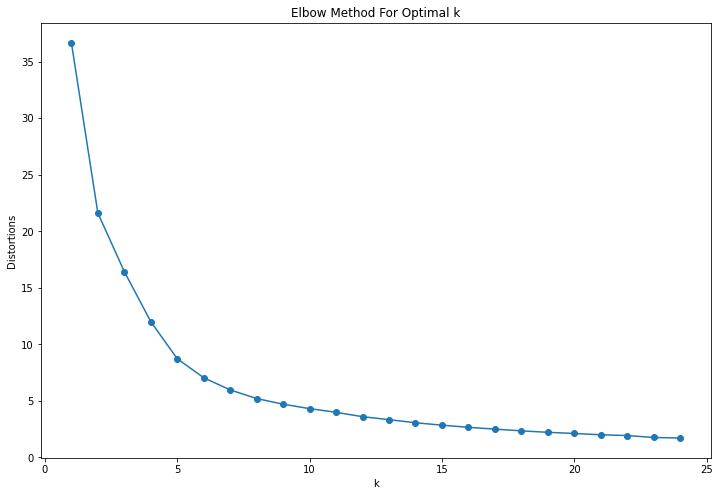

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(range(1,25), distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)

KMeans(n_clusters=5)

In [11]:
kmeans2 = KMeans(n_clusters=5, init='k-means++')
kmeans2.fit(franca[['customer_age_x']])

KMeans(n_clusters=5)

In [13]:
franca['location_cluster'] = kmeans.predict(franca[['geolocation_lat','geolocation_lng']])
franca['age_cluster'] = kmeans2.predict(franca[['customer_age_x']])
#franca[franca.cluster == 4].shape[0]

<ipython-input-13-b6599234011d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-b6599234011d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
def recommend_items(df, longitude, latitude,age):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    cluster_age = kmeans2.predict(np.array([age]).reshape(1,-1))[0]
    # Get the purchased items in this cluster
    items=df[df['location_cluster']==cluster][['product_id','age_cluster','location_cluster']]
    
    items_new = items[items['age_cluster']==cluster_age][['product_id','age_cluster','location_cluster']]
    unique_items=items_new.drop_duplicates(subset="product_id")
    unique_items2=items.drop_duplicates(subset="product_id")
    
    df_id_name=pd.read_csv ('archive/olist_products_dataset.csv',usecols= ['product_id','product_category_name'])
    merge=pd.merge(unique_items, df_id_name, how='inner', left_on = 'product_id', right_on = 'product_id')
    merge2=pd.merge(unique_items2, df_id_name, how='inner', left_on = 'product_id', right_on = 'product_id')
    return merge,merge2

In [21]:
both_cluster , location_cluster = recommend_items(franca,-20.509897,-47.397866,43)
location_cluster.head()

,product_id,age_cluster,location_cluster,product_category_name
0,a9516a079e37a9c9c36b9b78b10169e8,1,2,moveis_escritorio
1,99a4788cb24856965c36a24e339b6058,2,2,cama_mesa_banho
2,83fe1ea6fd12c51fcd341a9968e65cc3,1,2,brinquedos
3,ccb3df28522945422e24b108603a1d04,1,2,automotivo
4,cb7d42475660f66a519c76f55715cd32,1,2,telefonia


In [22]:
both_cluster.head()

,product_id,age_cluster,location_cluster,product_category_name
0,a9516a079e37a9c9c36b9b78b10169e8,1,2,moveis_escritorio
1,83fe1ea6fd12c51fcd341a9968e65cc3,1,2,brinquedos
2,ccb3df28522945422e24b108603a1d04,1,2,automotivo
3,cb7d42475660f66a519c76f55715cd32,1,2,telefonia
4,7fb04722aba7a2b632bac8f9819796f3,1,2,beleza_saude


In [28]:
#To view the range of the age
franca[franca['age_cluster']==1].drop_duplicates(subset="customer_age_x").head()

,customer_id,customer_zip_code_prefix,customer_age_x,geolocation_lat,geolocation_lng,geolocation_city,product_id,customer_age_y,location_cluster,age_cluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,50,-20.509897,-47.397866,franca,a9516a079e37a9c9c36b9b78b10169e8,50,2,1
294,661897d4968f1b59bfff74c7eb2eb4fc,14409,46,-20.509897,-47.397866,franca,83fe1ea6fd12c51fcd341a9968e65cc3,46,2,1
441,702b62324327ccba20f1be3465426437,14409,35,-20.509897,-47.397866,franca,ccb3df28522945422e24b108603a1d04,35,2,1
588,bdf997bae7ca819b0415f5174d6b4302,14409,48,-20.509897,-47.397866,franca,cb7d42475660f66a519c76f55715cd32,48,2,1
1176,d3c09791fc7ede919353f0488a3375a6,14409,44,-20.509897,-47.397866,franca,7fb04722aba7a2b632bac8f9819796f3,44,2,1
